In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
import keras
%matplotlib inline

Using TensorFlow backend.


In [85]:
# Load training text file
Data_train = np.loadtxt('training_data.txt', skiprows = 1)
X_train = Data_train[:, 1:]
y_train = Data_train[:, 0]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

trainx = X_train[0:10000]
trainy = y_train[0:10000]
testx = X_train[10000:]
testy = y_train[10000:]

X_train shape: (20000, 1000)
y_train shape: (20000,)


In [89]:
for i in range(len(X_train[0])):
    col = X_train[:, i]
    mean = np.mean(col)
    std = np.std(col)
    X_train[:, i] = (col - mean) / std

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras import regularizers

# Build sequential model
model = Sequential()

# Hidden layers
model.add(Dense(100, activation="sigmoid", input_shape=(1000,)))
model.add(Dropout(0.4))
model.add(Dense(50, activation="sigmoid"))
model.add(Dropout(.4))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(.4))


# Output layer
model.add(Dense(1, activation="sigmoid"))
# Print a summary
model.summary()
# Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 100)               100100    
_________________________________________________________________
dropout_92 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_93 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_94 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 51        
Total para

In [93]:
fit = model.fit(X_train, y_train, batch_size=128, epochs=12, validation_split=0.2, shuffle=True, verbose=1)

Train on 16000 samples, validate on 4000 samples
Epoch 1/12
16000/16000 [==============================] - 4s 222us/step - loss: 0.6953 - acc: 0.5652 - val_loss: 0.5135 - val_acc: 0.8190
Epoch 2/12
16000/16000 [==============================] - 1s 67us/step - loss: 0.4259 - acc: 0.8185 - val_loss: 0.3515 - val_acc: 0.8498
Epoch 3/12
16000/16000 [==============================] - 1s 66us/step - loss: 0.3553 - acc: 0.8569 - val_loss: 0.3498 - val_acc: 0.8560
Epoch 4/12
16000/16000 [==============================] - 1s 72us/step - loss: 0.3387 - acc: 0.8660 - val_loss: 0.3510 - val_acc: 0.8525
Epoch 5/12
16000/16000 [==============================] - 1s 77us/step - loss: 0.3185 - acc: 0.8746 - val_loss: 0.3518 - val_acc: 0.8535
Epoch 6/12
16000/16000 [==============================] - 1s 85us/step - loss: 0.3086 - acc: 0.8763 - val_loss: 0.3551 - val_acc: 0.8562
Epoch 7/12
16000/16000 [==============================] - 1s 88us/step - loss: 0.2998 - acc: 0.8779 - val_loss: 0.3561 - val_acc

In [94]:
## Printing the accuracy of our model, according to the loss function specified in model.compile above
score = model.evaluate(X_train, y_train, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

20000/20000 [==============================] - 2s 97us/step
Test score: 0.24788489606380462
Test accuracy: 0.9018


## Comparing different dropout values on one layer

In [8]:
scores = [0]*10
accuracy = [0]*10
for i in range(10):
    # Build sequential model
    model = Sequential()

    # Hidden layers
    model.add(Dense(500, activation="tanh", input_shape=(1000,)))
    model.add(Dropout(0.1 * i))
    model.add(Dense(100, activation="tanh"))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))
    # Print a summary
    model.summary()
    # Compile
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    fit = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, shuffle=True, verbose=1)
    score = model.evaluate(X_train, y_train, verbose=1)
    scores[i] = score[0]
    accuracy[i] = score[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 550,701
Trainable params: 550,701
Non-trainable params: 0
_________________________________________________________________
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 5s 282us/step - loss: 0.4008 - acc: 0.8190 - val_loss: 0.3577 - val_acc: 0.8405
Epoch 2/10
16000/16000 [==============================] - 4s 275us/step - loss: 0

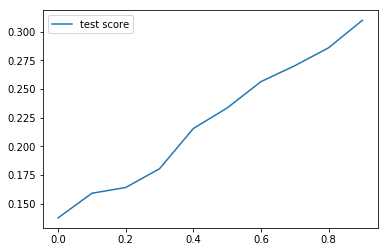

In [19]:
arange = np.multiply(range(10), .1)
plt.plot(arange,scores, label = 'test score')
plt.legend()
plt.show()

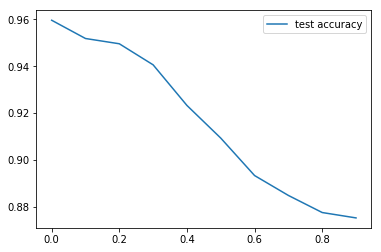

In [20]:
plt.plot(arange,accuracy, label = 'test accuracy')
plt.legend()
plt.show()

In [24]:
scores = []
accuracy = []
totalscores = []
accuracies = []
for j in range(10):
    for i in range(10):
        # Build sequential model
        model = Sequential()

        # Hidden layers
        model.add(Dense(500, activation="tanh", input_shape=(1000,)))
        model.add(Dropout(0.025 * j))
        model.add(Dense(100, activation="relu"))
        model.add(Dropout(.025*i))

        # Output layer
        model.add(Dense(1, activation="sigmoid"))
        
        # Compile
        model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
        fit = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, shuffle=True, verbose=1)
        score = model.evaluate(X_train, y_train, verbose=1)
        scores.append(score[0])
        accuracy.append(score[1])
    totalscores.append(scores)
    accuracies.append(accuracy)
    scores = []
    accuracy = []
    print( j,i)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 17s 1ms/step - loss: 0.4092 - acc: 0.8168 - val_loss: 0.3541 - val_acc: 0.8445
Epoch 2/10
16000/16000 [==============================] - 7s 438us/step - loss: 0.3090 - acc: 0.8692 - val_loss: 0.3523 - val_acc: 0.8508
Epoch 3/10
16000/16000 [==============================] - 7s 432us/step - loss: 0.2603 - acc: 0.8931 - val_loss: 0.3655 - val_acc: 0.8498
Epoch 4/10
16000/16000 [==============================] - 6s 406us/step - loss: 0.2079 - acc: 0.9186 - val_loss: 0.3884 - val_acc: 0.8427
Epoch 5/10
16000/16000 [==============================] - 6s 371us/step - loss: 0.1486 - acc: 0.9504 - val_loss: 0.4162 - val_acc: 0.8353
Epoch 6/10
16000/16000 [==============================] - 5s 307us/step - loss: 0.0949 - acc: 0.9736 - val_loss: 0.4722 - val_acc: 0.8353
Epoch 7/10
16000/16000 [==============================] - 5s 313us/step - loss: 0.0542 - acc: 0.9892 - val_loss: 0.5098 - va

In [27]:
len(totalscores)

10

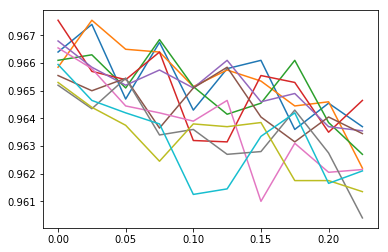

In [39]:
anewrange = np.multiply(range(10),.025)
for i in range(10):
    plt.plot(anewrange,accuracies[i],label = anewrange[i])

plt.show()
    

In [54]:
# Build sequential model
model = Sequential()

        # Hidden layers
model.add(Dense(500, activation="tanh", input_shape=(1000,)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="relu"))
model.add(Dropout(.1))

 # Output layer
model.add(Dense(1, activation="sigmoid"))
# Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
fit = model.fit(X_train, y_train, batch_size=128, epochs=2, validation_split=0.2, shuffle=True, verbose=1)
score = model.evaluate(X_train, y_train, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 16000 samples, validate on 4000 samples
Epoch 1/2
16000/16000 [==============================] - 19s 1ms/step - loss: 0.4097 - acc: 0.8137 - val_loss: 0.3553 - val_acc: 0.8498
Epoch 2/2
20000/20000 [==============================] - 7s 355us/step
Test score: 0.27085585519075395
Test accuracy: 0.88955


In [44]:
score = model.evaluate(X_train, y_train, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

20000/20000 [==============================] - 6s 320us/step
Test score: 0.25915315672159195
Test accuracy: 0.89765


In [59]:
X_test = np.loadtxt('test_data.txt',skiprows = 1)
pred = model.predict(X_test)
super_thresh = pred >= .5
pred.fill(0)
pred[super_thresh] = 1
submission = [[i+1, int(pred[i])] for i in range(len(pred))]
submission.insert(0, ['Id','Prediction'])
with open('submission.csv', 'w') as f:
    for line in submission:
        f.write(','.join(map(str, line)) + '\n')

In [56]:
model.predict(X_test)

array([[0.952728  ],
       [0.8396885 ],
       [0.30971947],
       ...,
       [0.00741125],
       [0.9782658 ],
       [0.09041308]], dtype=float32)